In [1]:
import numpy as np
from sklearn.cluster import SpectralClustering,KMeans
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import matthews_corrcoef,accuracy_score,precision_score,recall_score,confusion_matrix
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import os

In [2]:
outputfolder="figures/"

# HL: use this model
modelname="release_general_model" 
os.makedirs(outputfolder+"/"+modelname+"/",exist_ok = True)

In [3]:
# HL: transfer from dataden "/umms-kinfai/duolin/ying/reditools2_candidates/"
hash_candidat={}
hash_candidat['AFG-H1_directRNA']='H1-AFG.candidate_sites.tab'
hash_candidat['AFG-H9_directRNA']='H9-AFG.candidate_sites.tab'
hash_candidat["PGC-H1_directRNA"]='H1-PGC.candidate_sites.tab'
hash_candidat["DE-H1_directRNA"]='H1-DE.candidate_sites.tab'
hash_candidat["DE-H9_directRNA"]='H9-DE.candidate_sites.tab'
hash_candidat["GM12878_directRNA"]='GM12878.candidate_sites.tab'
hash_candidat["H1-hESC_directRNA"]='H1-hESC.candidate_sites.tab'
hash_candidat["H9-hESC_directRNA"]='H9-hESC.candidate_sites.tab'
hash_candidat['HEK293T_DKO_directRNA']='HEK293T_WT.candidate_sites.tab'
hash_candidat["HEK293T_WT_directRNA"]='HEK293T_WT.candidate_sites.tab'
hash_candidat["HCT116_WT"]='HCT116.candidate_sites.tab'
hash_candidat["HEK293T_WT"]='HEK293T_WT.candidate_sites.tab'


In [4]:
long_reads_min_coverage = longread_coverage_cutoff = 5

In [5]:
#REDD
featuredim=5
windowsize=9
inputfolder="/nfs/turbo/umms-kinfai/haorli/20240314_ReDD_result_data/figure2e/ReDD_results/"
# inputfolder="/scratch/kinfai_root/kinfai0/haorli/duolin/duolin/modification/Eventfeature_5feature_win9/"
# copy from /scratch/kinfai_root/kinfai0/haorli/duolin/duolin/modification/Eventfeature_5feature_win9/release_general_model
modelname = 'release_general_model'
filename=inputfolder+"/"+modelname+ "/"+"HEK_WT_pass_onlycandidate.txt"

datatype="HEK293T_WT"
candidatefile="/nfs/turbo/umms-kinfai/haorli/20240314_ReDD_result_data/figure2a/reditools2_candidates/"+hash_candidat[datatype]

AG_ratio_per_site={}
shortreadcoverage={}
input = open(candidatefile,'r')
for line in input:
    chr_ = line.split()[0]
    pos_ = line.split()[1]
    chrpos=chr_+"-"+pos_
    AG_ratio_per_site[chrpos]=float(line.split("\t")[3])
    shortreadcoverage[chrpos]=float(line.split("\t")[4])
#     if shortreadcoverage[chrpos] < 10:
#         continue


input = open(filename)
pos_coverage={}
coverage = {}
cutoff = 0.5#0.5
for line in input:
    score=float(line.split("\t")[-1])
    if score>=cutoff:
       predict_label=1
    else:
       predict_label=0
    
    transid= line.split("\t")[2]
    transpos = line.split("\t")[3]
    chrpos = transid+"-"+transpos
    
    if chrpos not in pos_coverage.keys():
        pos_coverage[chrpos]=predict_label
        coverage[chrpos]=1
    else:
        pos_coverage[chrpos]+=predict_label
        coverage[chrpos]+=1

HEK293T_ind_predict_value_all={}
HEK293T_ind_true_value_all = {}
for site in AG_ratio_per_site:   
     if site in pos_coverage:
          if coverage[site] >= long_reads_min_coverage:
            
              HEK293T_ind_predict_value_all[site]=float(pos_coverage[site]/coverage[site])
              HEK293T_ind_true_value_all[site] = AG_ratio_per_site[site]

In [6]:
#REDD
featuredim=5
windowsize=9
inputfolder="/nfs/turbo/umms-kinfai/haorli/20240314_ReDD_result_data/figure2e/ReDD_results/"
# inputfolder="/scratch/kinfai_root/kinfai0/haorli/duolin/duolin/modification/Eventfeature_5feature_win9/"
# copy from /scratch/kinfai_root/kinfai0/haorli/duolin/duolin/modification/Eventfeature_5feature_win9/release_general_model
modelname = 'release_general_model'
filename=inputfolder+"/"+modelname+ "/"+"HCT116_WT_onlycandidate.txt"

datatype="HCT116_WT"
candidatefile="/nfs/turbo/umms-kinfai/haorli/20240314_ReDD_result_data/figure2a/reditools2_candidates/"+hash_candidat[datatype]

AG_ratio_per_site={}
shortreadcoverage={}
input = open(candidatefile,'r')
for line in input:
    chr_ = line.split()[0]
    pos_ = line.split()[1]
    chrpos=chr_+"-"+pos_
    AG_ratio_per_site[chrpos]=float(line.split("\t")[3])
    shortreadcoverage[chrpos]=float(line.split("\t")[4])
#     if shortreadcoverage[chrpos] < 10:
#         continue

input = open(filename)
pos_coverage={}
coverage = {}
cutoff = 0.5#0.5
for line in input:
    score=float(line.split("\t")[-1])
    if score>=cutoff:
       predict_label=1
    else:
       predict_label=0
    
    transid= line.split("\t")[2]
    transpos = line.split("\t")[3]
    chrpos = transid+"-"+transpos
    
    if chrpos not in pos_coverage.keys():
        pos_coverage[chrpos]=predict_label
        coverage[chrpos]=1
    else:
        pos_coverage[chrpos]+=predict_label
        coverage[chrpos]+=1

HCT116_predict_value_all={}
HCT116_true_value_all = {}
for site in AG_ratio_per_site:   
     if site in pos_coverage:
          if coverage[site] >= long_reads_min_coverage:
              HCT116_predict_value_all[site]=float(pos_coverage[site]/coverage[site])
              HCT116_true_value_all[site] = AG_ratio_per_site[site]

In [7]:
import pandas as pd
from pathlib import Path

In [8]:
# export to csv
df = pd.DataFrame({'truth':HCT116_true_value_all,'ReDD':HCT116_predict_value_all})
df.index.name = 'Site'
Path('plot_data/').mkdir(exist_ok=True,parents=True)
df.to_csv('plot_data/HCT116_site_ratio.tsv',sep='\t',index=True)
HCT_error = np.abs(df['ReDD']-df['truth'])
# export to csv
df = pd.DataFrame({'truth':HEK293T_ind_true_value_all,'ReDD':HEK293T_ind_predict_value_all})
df.index.name = 'Site'
Path('plot_data/').mkdir(exist_ok=True,parents=True)
df.to_csv('plot_data/HEK293T_independent_sample_site_ratio.tsv',sep='\t',index=True)
HEK_error = np.abs(df['ReDD']-df['truth'])


In [9]:
import scipy.stats

<Axes: >

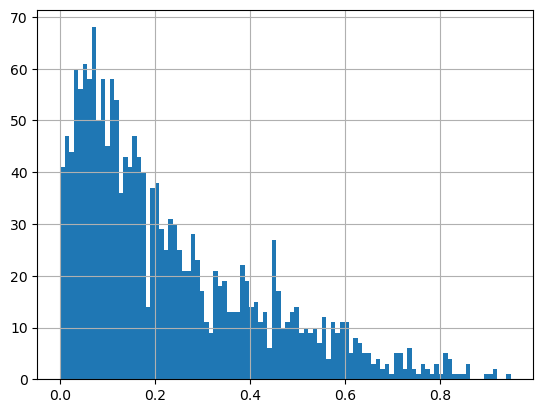

In [10]:
HCT_error.hist(bins=100)

<Axes: >

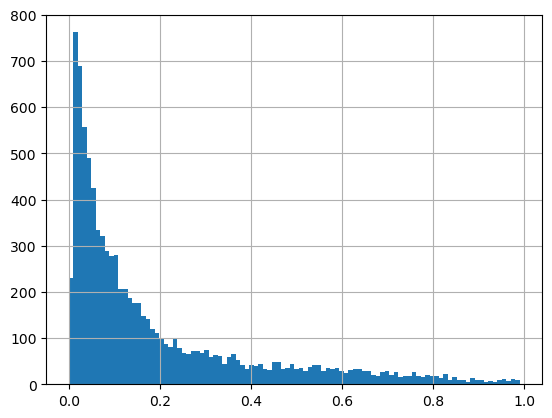

In [11]:
HEK_error.hist(bins=100)

In [12]:
scipy.stats.mannwhitneyu(HCT_error.values.astype(float),HEK_error.values.astype(float),alternative='greater')

MannwhitneyuResult(statistic=9681896.5, pvalue=1.8785759922257467e-45)

In [9]:
num_bins = 5
binsize=1/num_bins
def binize_list(true_list,predict_list):
    true_list,predict_list = np.array(true_list),np.array(predict_list)
    ratio_list = np.arange(0,1,binsize) #np.random.uniform(0.0, 1.0, 30)
    ratio_list.sort()
    sample_size=[]
    AG_ratios_bin=[]
    predict_ratio_bin = []
    ratio_bin_list=[]
    for index in range(len(ratio_list)):
        start = ratio_list[index]
        end = start+binsize
        index_start_end = np.where((true_list<=end) &(true_list>start))[0]
        if(len(index_start_end)>1):
            ratio_bin_list.append(start)
            AG_ratios_bin.append(true_list[index_start_end])
            predict_ratio_bin.append(predict_list[index_start_end])
            sample_size.append(len(predict_list[index_start_end]))
    return AG_ratios_bin,predict_ratio_bin,sample_size


In [10]:
HEK293T_ind_true_list,HEK293T_ind_predict_list = [],[]
for key in HEK293T_ind_true_value_all:
    true_val,predict_val = HEK293T_ind_true_value_all[key],HEK293T_ind_predict_value_all[key]
    HEK293T_ind_true_list.append(true_val)
    HEK293T_ind_predict_list.append(predict_val)
HCT116_true_list,HCT116_predict_list = [],[]
for key in HCT116_true_value_all:
    true_val,predict_val = HCT116_true_value_all[key],HCT116_predict_value_all[key]
    HCT116_true_list.append(true_val)
    HCT116_predict_list.append(predict_val)

In [11]:
HCT116_AG_ratios_bin,HCT116_predict_ratio_bin,HCT116_sample_size = binize_list(HCT116_true_list,HCT116_predict_list)
HEK293T_ind_AG_ratios_bin,HEK293T_ind_predict_ratio_bin,HEK293T_ind_sample_size = binize_list(HEK293T_ind_true_list,HEK293T_ind_predict_list)


In [12]:
def cal_MAE(AG_ratios_bin,predict_ratio_bin):
    mae=np.abs(np.asarray([np.median(x) for x in AG_ratios_bin])-np.asarray([np.median(x) for x in predict_ratio_bin])).mean()
    return mae

In [13]:
HCT116_mae = cal_MAE(HCT116_AG_ratios_bin,HCT116_predict_ratio_bin)
HEK293T_ind_mae = cal_MAE(HEK293T_ind_AG_ratios_bin,HEK293T_ind_predict_ratio_bin)


In [22]:
HCT116_mae

0.12275560453963708

In [23]:
HEK293T_ind_mae

0.10323370849339682

In [14]:
# export to csv
df = pd.DataFrame([HCT116_mae,HEK293T_ind_mae]).T
df.columns = ['HCT116','HEK293T_independent_sample']
df.to_csv('plot_data/MAE.tsv',sep='\t',index=False)

In [15]:
HCT116_errors=[[x1-x2 for x1,x2 in zip(sublist1,sublist2)] for sublist1,sublist2 in zip(HCT116_predict_ratio_bin,HCT116_AG_ratios_bin)]


In [16]:
HEK293T_ind_errors=[[x1-x2 for x1,x2 in zip(sublist1,sublist2)] for sublist1,sublist2 in zip(HEK293T_ind_predict_ratio_bin,HEK293T_ind_AG_ratios_bin)]


In [18]:
median_error_HCT116 = [np.median(x) for x in HCT116_errors]
median_error_HEK293T_ind = [np.median(x) for x in HEK293T_ind_errors]

In [19]:
median_error_HCT116

[0.0611111111111111,
 -0.03408200734394125,
 -0.12740384615384617,
 -0.06857142857142862,
 -0.13181818181818172]

In [20]:
df = pd.DataFrame([median_error_HCT116,median_error_HEK293T_ind]).T
df.columns = ['HCT116','HEK293T_independent_sample']
df.index = ['(0,0.2]','(0.2,0.4]','(0.4,0.6]','(0.6,0.8]','(0.8,1.0]']
df.to_csv('plot_data/error.tsv',sep='\t')

In [21]:
df

,HCT116,HEK293T_independent_sample
"(0,0.2]",0.061111,0.037948
"(0.2,0.4]",-0.034082,-0.053333
"(0.4,0.6]",-0.127404,-0.086667
"(0.6,0.8]",-0.068571,-0.065417
"(0.8,1.0]",-0.131818,-0.145714
